<a href="https://colab.research.google.com/github/kimjaehwankimjaehwan/Writing-a-thesis/blob/main/3month_day1_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

랜덤 포레스트

In [ ]:
pip install ucimlrepo

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
wine_quality = fetch_ucirepo(id=186)

# data (as pandas dataframes)
X = wine_quality.data.features
y = wine_quality.data.targets

# metadata
print(wine_quality.metadata)

# variable information
print(wine_quality.variables)


{'uci_id': 186, 'name': 'Wine Quality', 'repository_url': 'https://archive.ics.uci.edu/dataset/186/wine+quality', 'data_url': 'https://archive.ics.uci.edu/static/public/186/data.csv', 'abstract': 'Two datasets are included, related to red and white vinho verde wine samples, from the north of Portugal. The goal is to model wine quality based on physicochemical tests (see [Cortez et al., 2009], http://www3.dsi.uminho.pt/pcortez/wine/).', 'area': 'Business', 'tasks': ['Classification', 'Regression'], 'characteristics': ['Multivariate'], 'num_instances': 4898, 'num_features': 11, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['quality'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2009, 'last_updated': 'Wed Nov 15 2023', 'dataset_doi': '10.24432/C56S3T', 'creators': ['Paulo Cortez', 'A. Cerdeira', 'F. Almeida', 'T. Matos', 'J. Reis'], 'intro_paper': {'title': 'Modeling wine preferences by data mining from physicoc

In [ ]:
X

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8


In [ ]:
y

,quality
0,5
1,5
2,5
3,6
4,5
...,...
6492,6
6493,5
6494,6
6495,7


In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         6497 non-null   float64
 1   volatile_acidity      6497 non-null   float64
 2   citric_acid           6497 non-null   float64
 3   residual_sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free_sulfur_dioxide   6497 non-null   float64
 6   total_sulfur_dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
dtypes: float64(11)
memory usage: 558.5 KB


In [ ]:
# 결정트리
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [ ]:
import pandas as pd
import numpy as np



In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [ ]:
X_train.shape , X_test.shape , y_train.shape , y_test.shape

((4872, 11), (1625, 11), (4872, 1), (1625, 1))

In [ ]:
# 모델 학습
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [ ]:
# 모델 평가
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.5907692307692308


In [ ]:
# 필요한 라이브러리 임포트
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score

# 데이터를 훈련 세트와 테스트 세트로 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 결정 트리 분류기 생성
clf = DecisionTreeClassifier(random_state=42)

# 하이퍼파라미터 그리드 설정
param_grid = {
    'criterion': ['gini', 'entropy'],          # 분할 기준
    'max_depth': [None, 10, 20, 30],           # 트리의 최대 깊이
    'min_samples_split': [2, 5, 10],           # 노드를 분할하기 위한 최소 샘플 수
    'min_samples_leaf': [1, 2, 4]              # 리프 노드가 되기 위한 최소 샘플 수
}

# GridSearchCV 설정 (교차 검증 포함)
grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, cv=5, n_jobs=-1, scoring='accuracy')

# 그리드 서치 실행 (모델 학습)
grid_search.fit(X_train, y_train)

# 최적의 하이퍼파라미터 출력
print("최적의 하이퍼파라미터: ", grid_search.best_params_)

# 최적의 모델로 테스트 세트에 대한 예측 수행
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# 정확도 계산
accuracy = accuracy_score(y_test, y_pred)
print(f"최적 모델의 테스트 세트 정확도: {accuracy * 100:.2f}%")


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:737: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


최적의 하이퍼파라미터:  {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
최적 모델의 테스트 세트 정확도: 59.00%


In [ ]:
from sklearn.model_selection import cross_validate
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_jobs=-1, random_state=42)
scores = cross_validate(rf, X_train, y_train, return_train_score=True, n_jobs=-1)
print(np.mean(scores['train_score']), np.mean(scores['test_score']))

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:737: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


1.0 0.6688478196490708


In [ ]:
rf.fit(X_train, y_train)
print(rf.feature_importances_)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[0.0735396  0.10131462 0.07799507 0.0827602  0.0871585  0.08619152
 0.09051046 0.10157197 0.08533168 0.08612126 0.12750512]


In [ ]:
rf = RandomForestClassifier(oob_score=True, n_jobs=-1, random_state=42)
rf.fit(X_train, y_train)
print(rf.oob_score_)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


0.686165095247258


In [ ]:
from sklearn.ensemble import ExtraTreesClassifier

et = ExtraTreesClassifier(n_jobs=-1, random_state=42)
scores = cross_validate(et, X_train, y_train, return_train_score=True, n_jobs=-1)
print(np.mean(scores['train_score']), np.mean(scores['test_score']))

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:737: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


1.0 0.6653846153846154


In [ ]:
et.fit(X_train, y_train)
print(et.feature_importances_)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[0.07728042 0.10144266 0.08283555 0.08343834 0.08309396 0.08618944
 0.08581895 0.09199701 0.08302359 0.08605719 0.13882288]


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier(random_state=42)
scores = cross_validate(gb, X_train, y_train, return_train_score=True, n_jobs=-1)
print(np.mean(scores['train_score']), np.mean(scores['test_score']))

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:737: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


0.7173366134395723 0.5864914488783592


In [ ]:
gb = GradientBoostingClassifier(n_estimators=500, learning_rate=0.2, random_state=42) ## n_estimator로 트리의 갯수를 500개로 조정, learning_rate 기본값인 0.1에서 0.2로 변경
scores = cross_validate(gb, X_train, y_train, return_train_score=True, n_jobs=-1)
print(np.mean(scores['train_score']), np.mean(scores['test_score']))

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:737: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


0.9649292216528202 0.6282485007773746


In [ ]:
gb.fit(X_train, y_train)
print(gb.feature_importances_)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[0.07190585 0.20675043 0.24079699 0.02272982 0.11473143 0.04242285
 0.02144565 0.0592025  0.09843357 0.036705   0.0848759 ]


In [ ]:

## n_estimate의 갯수를 조절해서 모델의 훈련데이터의 score와 테스트데이터의 score를 시각화 하기
train_scores = []
test_scores = []
estimators = range(5, 500, 50)
for i in range(5, 500, 50):
    gb = GradientBoostingClassifier(n_estimators=i, random_state=42)
    scores = cross_validate(gb, X_train, y_train, return_train_score=True, n_jobs=-1)
    train_scores.append(np.mean(scores['train_score']))
    test_scores.append(np.mean(scores['test_score']))

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:737: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:737: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:737: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:737: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:737: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklea

In [ ]:
list(map(lambda x: print(f"Train Score: {x[0]}, Test Score: {x[1]}"), zip(train_scores, test_scores)))
# 테스트데이터 중 가장 높은 점수 고르고 해당 모델의 인덱스와 훈련데이터 점수, 테스트 데이터 점수를 표시하기
print(train_scores[test_scores.index(max(test_scores))], max(test_scores),  test_scores.index(max(test_scores)))
print(estimators[test_scores.index(max(test_scores))])

Train Score: 0.5401675783922597, Test Score: 0.5285703709187828
Train Score: 0.6686072611980719, Test Score: 0.5824518768046199
Train Score: 0.7221470232295346, Test Score: 0.5876469608351226
Train Score: 0.7600050356365007, Test Score: 0.5943814318501518
Train Score: 0.793485816386947, Test Score: 0.5995779965943584
Train Score: 0.8200872835946207, Test Score: 0.6053503738802103
Train Score: 0.8436101163067725, Test Score: 0.6093934626489969
Train Score: 0.8624191211634079, Test Score: 0.6138178351965647
Train Score: 0.8810837333088957, Test Score: 0.6147810394610203
Train Score: 0.8948897661911855, Test Score: 0.6167041163840972
0.8948897661911855 0.6167041163840972 9
455


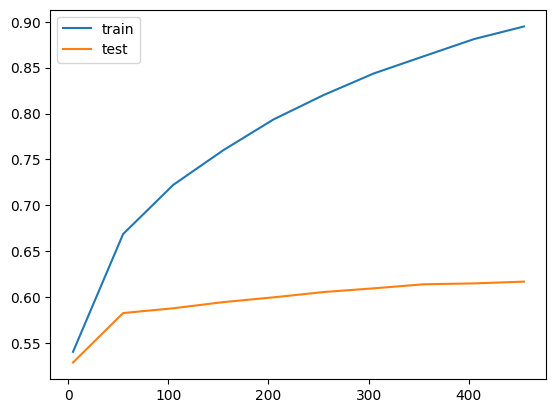

In [ ]:
import matplotlib.pyplot as plt
estimators = range(5, 500,50)
plt.plot(estimators, train_scores, label='train')
plt.plot(estimators, test_scores, label='test')
plt.legend()
plt.show()

In [ ]:
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingClassifier

hgb = HistGradientBoostingClassifier(random_state=42)
scores = cross_validate(hgb, X_train, y_train, return_train_score=True, n_jobs=-1)

print(np.mean(scores['train_score']), np.mean(scores['test_score']))

/usr/local/lib/python3.10/dist-packages/sklearn/experimental/enable_hist_gradient_boosting.py:15: UserWarning: Since version 1.0, it is not needed to import enable_hist_gradient_boosting anymore. HistGradientBoostingClassifier and HistGradientBoostingRegressor are now stable and can be normally imported from sklearn.ensemble.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:737: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


0.9215797967301456 0.603067298437847


In [ ]:
from sklearn.inspection import permutation_importance
hgb.fit(X_train, y_train)
result = permutation_importance(hgb, X_train, y_train, n_repeats=10, random_state=42, n_jobs=-1)

print(result.importances_mean)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[0.06267077 0.18114297 0.07704445 0.1063883  0.09996152 0.13519338
 0.14964403 0.10708101 0.10673465 0.12278237 0.22865114]


In [ ]:

result = permutation_importance(hgb, X_test, y_test, n_repeats=10, random_state=42, n_jobs=-1)
print(result.importances_mean)

[0.02261538 0.06653846 0.02692308 0.02423077 0.03884615 0.04653846
 0.04907692 0.02369231 0.02292308 0.043      0.10223077]


In [ ]:

hgb.score(X_test, y_test)

0.6361538461538462

In [ ]:

from xgboost import XGBClassifier
y_train_adjusted = y_train - 3

xgb = XGBClassifier(tree_method='hist', random_state=42)
scores = cross_validate(xgb, X_train, y_train_adjusted,
                        return_train_score=True, n_jobs=-1) # Use adjusted y_train

print(np.mean(scores['train_score']), np.mean(scores['test_score']))

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:737: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


0.9953338209292022 0.6488354186717998


In [ ]:

from lightgbm import LGBMClassifier

lgb = LGBMClassifier(random_state=42)
scores = cross_validate(lgb, X_train, y_train, return_train_score=True, n_jobs=-1)

print(np.mean(scores['train_score']), np.mean(scores['test_score']))


/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:737: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


0.9802770363751842 0.6444121566595099


In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

base_estimator = DecisionTreeClassifier(max_depth=5, random_state=42)
ab = AdaBoostClassifier(base_estimator=base_estimator, n_estimators=50, random_state=42)
scores = cross_validate(ab, X_train, y_train, return_train_score=True, n_jobs=-1)

print(np.mean(scores['train_score']), np.mean(scores['test_score']))

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:737: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


0.5919764907977562 0.4875851410379803


In [ ]:

ab = AdaBoostClassifier(base_estimator=base_estimator, n_estimators=100, random_state=42)
scores = cross_validate(ab, X_train, y_train, return_train_score=True, n_jobs=-1)

print(np.mean(scores['train_score']), np.mean(scores['test_score']))

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:737: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


0.64214918003708 0.5191484045309839


In [ ]:
ab.fit(X_train, y_train)
print(ab.feature_importances_)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[0.10003052 0.07948984 0.06637954 0.12500804 0.0640434  0.10669832
 0.07689671 0.14387094 0.0976198  0.05903851 0.08092439]


In [ ]:
## n_estimate의 갯수를 조절해서 모델의 훈련데이터의 score와 테스트데이터의 score를 시각화 하기
train_scores = []
test_scores = []
estimators = range(5, 500, 50)
for i in range(5, 500, 50):
    ab = AdaBoostClassifier(base_estimator=base_estimator, n_estimators=i, random_state=42)
    scores = cross_validate(ab, X_train, y_train, return_train_score=True, n_jobs=-1)
    train_scores.append(np.mean(scores['train_score']))
    test_scores.append(np.mean(scores['test_score']))

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:737: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:737: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:737: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:737: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:737: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklea

In [ ]:
list(map(lambda x: print(f"Train Score: {x[0]}, Test Score: {x[1]}"), zip(train_scores, test_scores)))
# 테스트데이터 중 가장 높은 점수 고르고 해당 모델의 인덱스와 훈련데이터 점수, 테스트 데이터 점수를 표시하기
print(train_scores[test_scores.index(max(test_scores))], max(test_scores),  test_scores.index(max(test_scores)))
print(estimators[test_scores.index(max(test_scores))])

Train Score: 0.4930758146779316, Test Score: 0.4537180721107574
Train Score: 0.5970274239699306, Test Score: 0.4883540016287851
Train Score: 0.6462860618742264, Test Score: 0.5260740727030428
Train Score: 0.6782276295146153, Test Score: 0.5420437550899535
Train Score: 0.6981428081981366, Test Score: 0.5572506848300882
Train Score: 0.7107466060076116, Test Score: 0.5622514251869402
Train Score: 0.7178175444954372, Test Score: 0.5637889612793366
Train Score: 0.7257556492100634, Test Score: 0.5732137040053306
Train Score: 0.7344619083372993, Test Score: 0.578604427333975
Train Score: 0.7390323154335663, Test Score: 0.5811047975124011
0.7390323154335663 0.5811047975124011 9
455


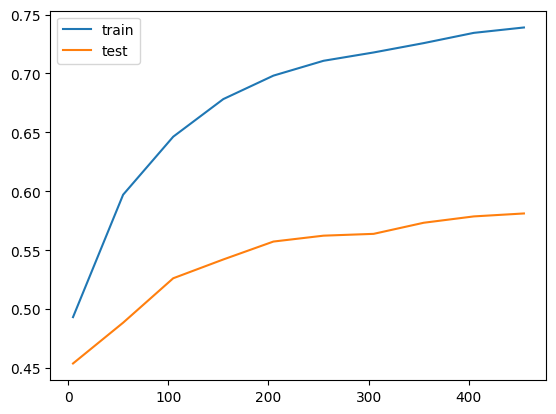

In [ ]:
import matplotlib.pyplot as plt
estimators = range(5, 500,50)
plt.plot(estimators, train_scores, label='train')
plt.plot(estimators, test_scores, label='test')
plt.legend()
plt.show()

In [ ]:

from sklearn.svm import SVC

svm = SVC(kernel='rbf', C=1.0, gamma='scale')
scores = cross_validate(svm, X_train, y_train, return_train_score=True, n_jobs=-1)

print(np.mean(scores['train_score']), np.mean(scores['test_score']))

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:737: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


0.4422746775404943 0.43794717553860957


In [ ]:
svm = SVC(kernel='rbf', C=5.0, gamma='scale')
scores = cross_validate(svm, X_train, y_train, return_train_score=True, n_jobs=-1)

print(np.mean(scores['train_score']), np.mean(scores['test_score']))

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:737: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


0.4711854098912074 0.46680813652180353


In [ ]:
svm.fit(X_train, y_train)
result = permutation_importance(svm, X_train, y_train, n_repeats=10, random_state=42, n_jobs=-1)

print(result.importances_mean)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[-3.84837406e-04  1.55859150e-03  9.62093515e-05  3.36732730e-03
 -1.92418703e-05  2.91514335e-02  3.62516837e-02  0.00000000e+00
 -1.53934962e-04  5.96497980e-04  3.16336348e-02]


In [ ]:
result = permutation_importance(svm, X_test, y_test, n_repeats=10, random_state=42, n_jobs=-1)

print(result.importances_mean)


[3.23076923e-03 3.07692308e-03 6.92307692e-04 5.30769231e-03
 7.69230769e-05 3.23846154e-02 1.14615385e-02 0.00000000e+00
 1.53846154e-04 6.15384615e-04 2.37692308e-02]


In [ ]:
svm.score(X_test, y_test)

0.47307692307692306